In [1]:
## ** HappyMonk Assignment **
## * Implementation of ANN on MNIST Datasets * 

import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [4]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
X_train[:, 0].shape

(784,)

In [5]:
Y_train

array([6, 9, 4, ..., 7, 4, 9])

In [6]:
def wts_bias():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    W3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

In [7]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

In [8]:
def ReLU_deriv(Z):
    return Z > 0

def one_mat(Y):
    one_mat_Y = np.zeros((Y.size, Y.max() + 1))
    one_mat_Y[np.arange(Y.size), Y] = 1
    one_mat_Y = one_mat_Y.T
    return one_mat_Y

In [9]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_mat_Y = one_mat(Y)
    dZ3 = A3 - one_mat_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3  
    b3 = b3 - alpha * db3  
    return W1, b1, W2, b2, W3, b3

In [10]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = wts_bias()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, W3, b3


In [11]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 4 9 ... 9 9 7] [6 9 4 ... 7 4 9]
0.09166101694915255
Iteration:  10
[9 4 9 ... 9 4 7] [6 9 4 ... 7 4 9]
0.12733898305084745
Iteration:  20
[6 4 9 ... 9 4 7] [6 9 4 ... 7 4 9]
0.14535593220338983
Iteration:  30
[6 4 9 ... 4 4 7] [6 9 4 ... 7 4 9]
0.16601694915254236
Iteration:  40
[6 4 9 ... 4 6 7] [6 9 4 ... 7 4 9]
0.21166101694915254
Iteration:  50
[6 4 9 ... 4 6 7] [6 9 4 ... 7 4 9]
0.2785593220338983
Iteration:  60
[6 4 9 ... 7 6 7] [6 9 4 ... 7 4 9]
0.35084745762711866
Iteration:  70
[6 4 1 ... 1 6 7] [6 9 4 ... 7 4 9]
0.36738983050847457
Iteration:  80
[6 4 1 ... 1 6 7] [6 9 4 ... 7 4 9]
0.3815932203389831
Iteration:  90
[6 4 1 ... 1 6 7] [6 9 4 ... 7 4 9]
0.3956949152542373
Iteration:  100
[6 4 1 ... 8 6 7] [6 9 4 ... 7 4 9]
0.4149322033898305
Iteration:  110
[6 9 1 ... 8 6 7] [6 9 4 ... 7 4 9]
0.4387627118644068
Iteration:  120
[6 9 1 ... 3 6 7] [6 9 4 ... 7 4 9]
0.46588135593220337
Iteration:  130
[6 9 1 ... 3 6 7] [6 9 4 ... 7 4 9]
0.4916271186440678
Iteration

In [12]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


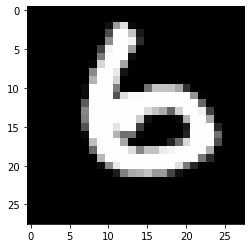

Prediction:  [9]
Label:  9


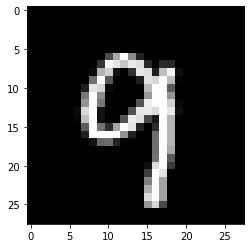

Prediction:  [9]
Label:  4


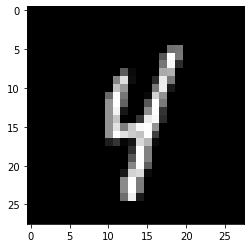

Prediction:  [9]
Label:  7


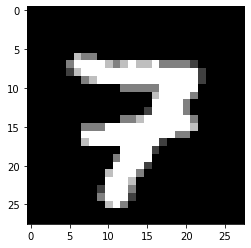

Prediction:  [7]
Label:  7


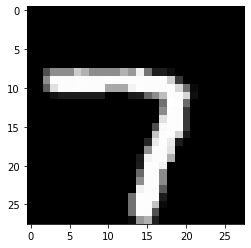

In [13]:
test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(1, W1, b1, W2, b2, W3, b3)
test_prediction(2, W1, b1, W2, b2, W3, b3)
test_prediction(3, W1, b1, W2, b2, W3, b3)
test_prediction(4, W1, b1, W2, b2, W3, b3)